# ANOVA

In [64]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Statistical functions.
import scipy.stats as stats

# Mathematical functions.
import math

# Data frames.
import pandas as pd

## More Samples

In [65]:
# First sample.
sample_a = np.random.normal(loc=10.0, scale=1.0, size=50)

# Second sample.
sample_b = np.random.normal(loc=10.0, scale=1.0, size=50)

# Third sample.
sample_c = np.random.normal(loc=10.0, scale=1.0, size=50)

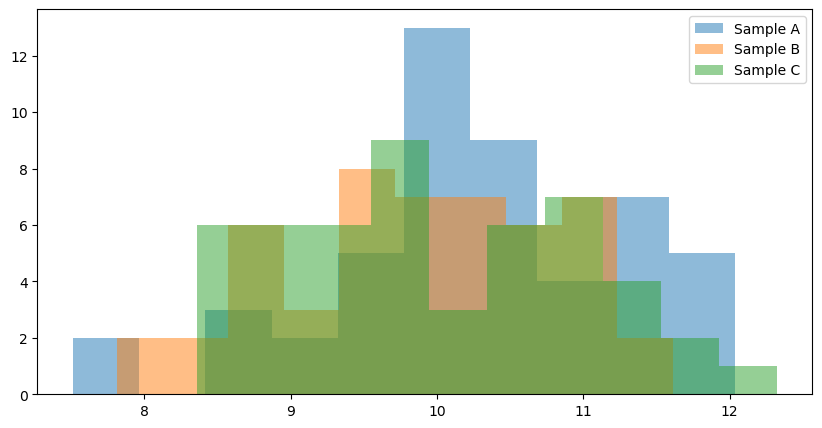

In [66]:
# Create histograms.
fig, ax = plt.subplots(figsize=(10, 5))

# Histogram of the first sample.
ax.hist(sample_a, bins=10, alpha=0.5, label='Sample A')

# Histogram of the second sample.
ax.hist(sample_b, bins=10, alpha=0.5, label='Sample B')

# Histogram of the third sample.
ax.hist(sample_c, bins=10, alpha=0.5, label='Sample C')

# Add a legend.
ax.legend();

In [67]:
# Independent samples t-test on sample_a and sample_b.
t_statistic, p_value = stats.ttest_ind(sample_a, sample_b)

# Show.
t_statistic, p_value

(2.2176237554283142, 0.02889060316715422)

The chance of seeing the t-test value as extreme as -0.36 is 71%, so cannot reject null. Theres no reason to suspect that the means are different

In [68]:
# Independent samples t-test on sample_b and sample_a.
t_statistic, p_value = stats.ttest_ind(sample_b, sample_a)

# Show.
t_statistic, p_value

(-2.2176237554283142, 0.02889060316715422)

notice the ttest value is now +ve (reflected), but p-value is the same

In [69]:
# Independent samples t-test on sample_a and sample_c.
t_statistic, p_value = stats.ttest_ind(sample_a, sample_c)

# Show.
t_statistic, p_value

(1.3957843845833775, 0.165933742347887)

cannot reject

In [70]:
# Independent samples t-test on sample_b and sample_c.
t_statistic, p_value = stats.ttest_ind(sample_b, sample_c)

# Show.
t_statistic, p_value

(-0.764552851942056, 0.44637494008852474)

cannot reject

## $n$ Samples

Question: If we havae 4 samples, how many different ttest can we perform?

In [71]:
# Number of samples.
n = 4

In [72]:
# Show the sample labels.
print(list(range(4)))

[0, 1, 2, 3]


For 4 samples, we can perform 6 t-tests:

[0, 1]  
[0, 2]  
[0, 3]  
[1, 2]  
[1, 3]  
[2, 3]  

In [73]:
# Number of ways of selecting two samples from n.
math.comb(n, 2)

6

In [74]:
# Suppose we had 6 samples.
n = 6
math.comb(n, 2)

15

In [75]:
# Suppose we had 7 samples.
n = 7
math.comb(n, 2)

21

## Type I Errors

In [76]:
def simulate_ttest(alpha=0.05):
    # Generate a random sample a.
    sample_a = np.random.normal(loc=10.0, scale=1.0, size=50)
    # Generate similar sample b.
    sample_b = np.random.normal(loc=10.0, scale=1.0, size=50)
    
    # Perform the t-test.
    _, p_value = stats.ttest_ind(sample_a, sample_b) # _ just ignore that value
    
    # Decide whether to reject the null hypothesis.
    if p_value < alpha:
        return True
    else:
        return False
    
simulate_ttest()

False

do not reject the null hypo, no evidence, the data are not extreme, the values from sample b are not different enough from sample A for u to reject the null hypo.

just remember that when using random, sometimes u DO get extreme values, and can reject null. how many times does that happen?

In [77]:
# Number of rejections.
no_rejections = 0

# Run several simulations.
for _ in range(10000):
    # Check if the null hypothesis is rejected.
    if simulate_ttest():
        # Increment the number of rejections.
        no_rejections += 1

# Show the number of rejections.
no_rejections

500

495/10000 = 0.05! 1/20 times
5% of the time, u end up rejecting the null when u shouldnt. 

When u have n=7, and u have to do t-tests on them, bc the value above is 21, u are expecting at least 1 false positive (reject null when u shouldnt assuming null is true). What if assuming alternative is true? 

type I (alpha, false positive) reject null when null is true

type II (beta, false negative) failure to reject null when null is false

1-beta is the power of test (the probability that the test correctly rejects the null hypothesis when the alternative hypothesis is true). 

https://en.wikipedia.org/wiki/Power_(statistics)

So question, why not make it lower? Say 0.01? The problem of that is, it will reduce the power of test (1-beta), which means it reduces the probability of rejecting the null hypothesis when the alternative is true. so it's better to increase the alpha.

## ANOVA

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html  
https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php  

In [78]:
# From Laerd.
beginner = np.random.normal(27.2, 3.04777, 10) # mean, std, num of obs
intermediate = np.random.normal(23.6, 3.30656, 10)
advanced = np.random.normal(23.4, 3.23866, 10)

In [79]:
# Create data frame. not a great way
df = pd.DataFrame({'Beginner': beginner, 'Intermediate': intermediate, 'Advanced': advanced})

# Show.
df

,Beginner,Intermediate,Advanced
0,29.839543,24.143023,22.944082
1,25.083210,22.133770,31.375430
2,29.297781,22.556432,24.659602
3,26.295909,22.395044,22.390951
4,25.802943,23.269717,22.564178
5,24.370317,22.236253,23.120814
6,27.832796,22.245766,27.614932
7,26.670949,25.492286,17.257155
8,27.033778,21.532994,22.337809
9,26.114192,24.203896,22.403583


In [80]:
# Describe.
df.describe()

,Beginner,Intermediate,Advanced
count,10.000000,10.000000,10.000000
mean,26.834142,23.020918,23.666854
std,1.737602,1.231670,3.713427
min,24.370317,21.532994,17.257155
25%,25.880756,22.238632,22.394109
50%,26.483429,22.475738,22.754130
75%,27.633042,23.924697,24.274905
max,29.839543,25.492286,31.375430


In [81]:
# Perform ANOVA.
f_statistic, p_value = stats.f_oneway(df['Beginner'], df['Intermediate'], df['Advanced'])

# Show.
f_statistic, p_value

(6.818149065627164, 0.004009312929323687)

scipy.stats.
tukey_hsd
tukey_hsd(*args)

Perform Tukey’s HSD test for equality of means over multiple treatments.

Tukey’s honestly significant difference (HSD) test performs pairwise comparison of means for a set of samples. Whereas ANOVA (e.g. f_oneway) assesses whether the true means underlying each sample are identical, Tukey’s HSD is a post hoc test used to compare the mean of each sample to the mean of each other sample.

The null hypothesis is that the distributions underlying the samples all have the same mean. The test statistic, which is computed for every possible pairing of samples, is simply the difference between the sample means. For each pair, the p-value is the probability under the null hypothesis (and other assumptions; see notes) of observing such an extreme value of the statistic, considering that many pairwise comparisons are being performed. Confidence intervals for the difference between each pair of means are also available.

In [82]:
# Tukey's HSD.
res = stats.tukey_hsd(df['Beginner'], df['Intermediate'], df['Advanced'])

# Show.
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      3.813     0.005     1.073     6.554
 (0 - 2)      3.167     0.021     0.427     5.908
 (1 - 0)     -3.813     0.005    -6.554    -1.073
 (1 - 2)     -0.646     0.830    -3.386     2.095
 (2 - 0)     -3.167     0.021    -5.908    -0.427
 (2 - 1)      0.646     0.830    -2.095     3.386



In [83]:
res.pvalue

array([[1.        , 0.00511132, 0.02105338],
       [0.00511132, 1.        , 0.82957366],
       [0.02105338, 0.82957366, 1.        ]])

In [84]:
resp=np.where(res.pvalue < 0.05)
print(resp)

(array([0, 0, 1, 2], dtype=int64), array([1, 2, 0, 0], dtype=int64))


In [85]:
resp[0]

array([0, 0, 1, 2], dtype=int64)

In [86]:
type(resp)

tuple

In [87]:
len(resp)

2

In [88]:
resp[0]

array([0, 0, 1, 2], dtype=int64)

In [89]:
resp[1]

array([1, 2, 0, 0], dtype=int64)

In [90]:
resp[0].shape

(4,)

In [91]:
if resp[0].shape == (0,):
    print('no signicant')
else:
    print('significant for')
    print(resp[0])

significant for
[0 0 1 2]


## Presenting the Data - weird way

In [92]:
# From Laerd.
beginner = np.random.normal(27.2, 3.04777, 10)
intermediate = np.random.normal(23.6, 3.30656, 10)
advanced = np.random.normal(23.4, 3.23866, 10)

# Concatenate arrays.
data = np.concatenate([beginner, intermediate, advanced])

# Show.
data

array([27.03093247, 32.31442146, 25.3448093 , 32.28435871, 33.91127879,
       22.80138697, 32.33864515, 26.24328438, 29.80418879, 24.99469318,
       26.04423609, 22.71757959, 18.15882659, 23.44486559, 27.56264112,
       20.87520431, 24.17678885, 25.50970475, 24.56383952, 25.38930454,
       15.91833944, 24.09844848, 19.16861102, 25.17911573, 21.03513272,
       18.31096669, 21.66314929, 19.42347365, 23.32975058, 21.2935315 ])

In [93]:
# Create the labels. - the weird way
labels = ['Beginner'] * 10 + ['Intermediate'] * 10 + ['Advanced'] * 10

# Show.
labels

['Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced']

In [94]:
# Create data frame. like those in Laerd
df = pd.DataFrame({'Course': labels, 'Time': data})

# Show.
df

,Course,Time
0,Beginner,27.030932
1,Beginner,32.314421
2,Beginner,25.344809
3,Beginner,32.284359
4,Beginner,33.911279
5,Beginner,22.801387
6,Beginner,32.338645
7,Beginner,26.243284
8,Beginner,29.804189
9,Beginner,24.994693


In [95]:
# Pull the groups out. more complicated
b_times = df[df['Course'] == 'Beginner']['Time']
i_times = df[df['Course'] == 'Intermediate']['Time']
a_times = df[df['Course'] == 'Advanced']['Time']



In [96]:
# it asks, is the value of Course equal to Beginner?
df['Course'] == 'Beginner'

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
Name: Course, dtype: bool

In [97]:
# pick up the rows that have true values
df[df['Course'] == 'Beginner']

,Course,Time
0,Beginner,27.030932
1,Beginner,32.314421
2,Beginner,25.344809
3,Beginner,32.284359
4,Beginner,33.911279
5,Beginner,22.801387
6,Beginner,32.338645
7,Beginner,26.243284
8,Beginner,29.804189
9,Beginner,24.994693


In [98]:
df[df['Course'] == 'Beginner']['Time']

0    27.030932
1    32.314421
2    25.344809
3    32.284359
4    33.911279
5    22.801387
6    32.338645
7    26.243284
8    29.804189
9    24.994693
Name: Time, dtype: float64

In [99]:
# Perform ANOVA.
f, p = stats.f_oneway(b_times, i_times, a_times)

# Show.
f, p

(15.111343473453887, 3.946748804892847e-05)

In [100]:
# Tukey's HSD.
res = stats.tukey_hsd(b_times, i_times, a_times)

# Show.
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      4.863     0.006     1.324     8.401
 (0 - 2)      7.765     0.000     4.226    11.304
 (1 - 0)     -4.863     0.006    -8.401    -1.324
 (1 - 2)      2.902     0.124    -0.637     6.441
 (2 - 0)     -7.765     0.000   -11.304    -4.226
 (2 - 1)     -2.902     0.124    -6.441     0.637



In [101]:
res.pvalue

array([[1.00000000e+00, 5.69471682e-03, 2.72084221e-05],
       [5.69471682e-03, 1.00000000e+00, 1.23518354e-01],
       [2.72084221e-05, 1.23518354e-01, 1.00000000e+00]])

In [102]:
resp=np.where(res.pvalue < 0.05)
print(resp)

(array([0, 0, 1, 2], dtype=int64), array([1, 2, 0, 0], dtype=int64))


In [103]:
type(resp)

tuple

In [104]:
len(resp)

2

In [105]:
resp[0]

array([0, 0, 1, 2], dtype=int64)

In [106]:
resp[1]

array([1, 2, 0, 0], dtype=int64)

In [107]:
resp[0].shape

(4,)

In [108]:
if resp[0].shape == (0,):
    print('no signicant')
else:
    print('significant for')
    print(resp[0])

significant for
[0 0 1 2]


## The F Statistic using numpy

https://en.wikipedia.org/wiki/F-test#One-way_analysis_of_variance

In [109]:
# From Laerd.
beginner = np.random.normal(27.2, 3.04777, 10)
intermediate = np.random.normal(23.6, 3.30656, 10)
advanced = np.random.normal(23.4, 3.23866, 10)

In [110]:
# Calculate the means.
beginner_mean = beginner.mean()
intermediate_mean = intermediate.mean()
advanced_mean = advanced.mean()

In [111]:
# Y(bar)_i from the formula.
Y_i = np.array([beginner_mean, intermediate_mean, advanced_mean])

# Show.
Y_i

array([27.77200129, 24.67922045, 22.86120879])

In [112]:
# Y(bar) from the formula.
Y = np.concatenate([beginner, intermediate, advanced]).mean()

# Show.
Y

25.104143511865754

In [113]:
# Before the sum of squares.
Y_i - Y

array([ 2.66785778, -0.42492306, -2.24293472])

In [114]:
# Calculate the sum of squares between.
(Y_i - Y)**2

array([7.11746514, 0.18055961, 5.03075616])

In [115]:
# Size of the samples.
n_i = np.array([beginner.size, intermediate.size, advanced.size])

# Show.
n_i

array([10, 10, 10])

In [116]:
# Number of groups.
K = 3

In [117]:
# From the formula.
n_i * (Y_i - Y)**2

array([71.17465143,  1.80559608, 50.30756158])

In [118]:
# From the formula.
(n_i * (Y_i - Y)**2).sum()

123.28780908918489

In [119]:
# From the formula.
(n_i * (Y_i - Y)**2).sum() / (K - 1)

61.643904544592445

In [120]:
# Numerator.
numerator = (n_i * (Y_i - Y)**2).sum() / (K - 1)

In [121]:
# The total number of values.
N = n_i.sum()

# Show.
N

30

In [122]:
# From the formula.
less_means = np.concatenate([beginner - beginner_mean, intermediate - intermediate_mean, advanced - advanced_mean])

# Show.
less_means

array([ 1.07891774,  1.0562926 , -0.14565695, -1.27360943, -1.01312115,
       -6.75966006,  3.85108622,  0.42640838,  2.76992949,  0.00941317,
        0.78711859, -1.17396502, -2.70957323, -0.57171845, -0.20438113,
        1.98894921,  2.11770026,  1.07975698, -2.05224965,  0.73836244,
       -4.24850736,  3.08928422,  4.16533098, -3.53136724,  1.3077836 ,
       -0.44591912, -0.39093681, -4.82883749,  0.41169349,  4.47147573])

In [123]:
# From the formula.
np.sum(less_means**2)

200.35660672197133

In [124]:
# Denominator.
denominator = np.sum(less_means**2) / (N - K)

# Show.
denominator

7.420615063776716

In [125]:
# My F statistic calculation.
F = numerator / denominator

# Show.
F

8.307115247832142

In [126]:
# Calculate F using scipy.
stats.f_oneway(beginner, intermediate, advanced)

F_onewayResult(statistic=8.307115247832149, pvalue=0.0015432273844754299)

## End